In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pmdarima.arima import auto_arima


In [3]:
df = pd.read_csv("BAJFINANCE.csv",sep=",")
df.head()
print('\n Shape of the data:')
print(df.shape)
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Close'])
for i in range(0,len(data)):
     new_data['Close'][i] = data['Close'][i]
    


 Shape of the data:
(5092, 15)


In [4]:
new_data.head()

,Close
0,50.75
1,48.1
2,44.6
3,45.25
4,42.9


In [5]:
# splitting into train and test
train = new_data[2200:3000]
test = new_data[3000:3150]
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of test set
print('\n Shape of testing set:')
print(test.shape)


 Shape of training set:
(800, 1)

 Shape of testing set:
(150, 1)


In [6]:
training = train['Close']
testing = test['Close']

In [7]:
model = auto_arima(training,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                   m=12,seasonal=True,trace=True,error_action='ignore',
                   suppress_warnings=True)
model.fit(training)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6608.765, Time=3.68 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6394.803, Time=1.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6609.490, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6287.153, Time=1.12 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=6240.479, Time=3.53 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=6196.291, Time=4.82 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=6172.450, Time=18.48 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=119.68 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=35.00 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=6174.764, Time=9.61 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=6173.745, Time=21.02 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=6177.725, Time=20.56 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=6172.182, Time=14.89 sec
 ARIMA(0,1,1)(4,1,0)[12]   

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(5, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [8]:
forecast = model.predict(n_periods=150)
forecast= pd.DataFrame(forecast,index=test.index,columns=['prediction'])

In [10]:
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-np.array(forecast['prediction'])),2)))
rms

117.96800885708316

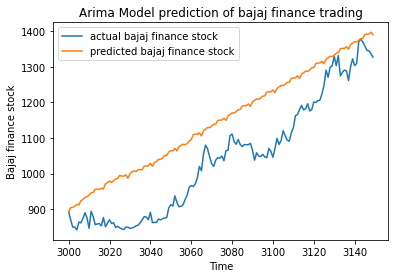

In [11]:
#plot

plt.title('Arima Model prediction of bajaj finance trading')
#plt.plot(train['Close'])
plt.plot(test['Close'],label='actual bajaj finance stock')
plt.xlabel('Time')
plt.ylabel('Bajaj finance stock')

plt.plot(forecast['prediction'],label='predicted bajaj finance stock')
plt.legend()
plt.show()
